In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pd.set_option('use_inf_as_na', True)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#from matplotlib.colors import ListedColormap
#from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from subprocess import call
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix

import xgboost as xgb

import seaborn as sns

from termcolor import colored


import concurrent.futures

#from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier
#import xgboost

from matplotlib.colors import ListedColormap
%pylab inline

pd.options.mode.chained_assignment = None  # default='warn'

#from IPython.display import Image
#from subprocess import call

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_f = pd.read_csv('E:/Host/Data/Bees/Finance_ML/day.csv', decimal='.', sep = ',', encoding='latin-1')

# data_f.columns = data_f.columns.str.replace("/", "del")
# data_f.columns = data_f.columns.str.replace(',','_')
# data_f.columns = data_f.columns.str.replace(')','')
# data_f.columns = data_f.columns.str.replace('(','')

# data.columns   = data.columns.str.replace("/", "del")
# data.columns = data.columns.str.replace(',','_')
# data.columns = data.columns.str.replace(')','')
# data.columns = data.columns.str.replace('(','')


In [3]:
def dbl_n(na):
    matr = pd.DataFrame(data_f[  
           (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
         #second feature   
         & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

    matr_dbl = pd.pivot_table(matr,
             index=['Date_test'],
                 values = ['res_profit', 'Year'],
                 aggfunc=['mean', 'count']                        
            
            )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
             index=['Year'],
                 values = ['Profit'],
                 aggfunc=['mean', 'count'],
                                   margins=True)
            
    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         

#STOCK
def dbl_s(na):
    matr_dbl_all = pd.DataFrame()    
    for na in na:
        matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

        matr_dbl = pd.pivot_table(matr,
                 index=['Symbol'],
                     values = 'res_profit',
                     aggfunc=['mean', 'count'],
                                  margins=True


                )
        matr_dbl.columns = ['Profit%', 'count']
        matr_dbl = matr_dbl.sort_values(by = 'count', ascending=False)
        
        matr_dbl_all = pd.concat([matr_dbl_all, matr_dbl], axis=1)
        #
        return(matr_dbl_all)
    


def year(na):

    matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])


    matr_dbl = pd.pivot_table(matr,
                 index=['Year'],
                     values = ['res_profit'],
                     aggfunc=['mean', 'count'],
                              margins=True

                )
    matr_dbl
    return(matr_dbl) 

def merg():    


    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
                         #3 feature   
             & (data_f[bb.index[merg][3]] >= bb['2f_min'][merg])
             & (data_f[bb.index[merg][3]] <= bb['2f_max'][merg])
            
        ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all)  

def dbldddd_n(na):

    matr = pd.DataFrame(data_f[  
               (data_f[aa.index[aa['namber']==na][0][1]] >= aa[aa['namber']==na]['f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][1]] <= aa[aa['namber']==na]['f_max'][0])
             #second feature   
             & (data_f[aa.index[aa['namber']==na][0][2]] >= aa[aa['namber']==na]['1f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][2]] <= aa[aa['namber']==na]['1f_max'][0])
                     #3 feature   
             & (data_f[aa.index[aa['namber']==na][0][3]] >= aa[aa['namber']==na]['2f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][3]] <= aa[aa['namber']==na]['2f_max'][0])
    ])

    matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = ['res_profit', 'Year'],
                     aggfunc=['mean', 'count']                        

                )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
                 index=['Year'],
                     values = ['Profit'],
                     aggfunc=['mean', 'count'],
                                       margins=True)

    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         


# АНАЛИЗ ФИЧЕЙ СВЕРКА ЧЕРЕЗ DATA_F + дубликаты
def table():
    matr_all   = pd.DataFrame()
    matr_all1  = pd.DataFrame()
    matr_all2  = pd.DataFrame()
    matr_all3  = pd.DataFrame()
    matr_all_d = pd.DataFrame()
    matr_glo   = pd.DataFrame()

    data_f_analiz_year_pivot = pd.pivot_table(data_f_analiz_year[data_f_analiz_year['proba2_range'] >= 0.055], 
        index = ['feature_f', 'feature1', 'feature2', 'feature3', 'deep__', 'n_est',  'proba2_range'], 
        values=['namber', 'namber1', 'namber2', 'profit', 'fe_imp1','fe_imp2', 'fe_imp3'], 
        aggfunc = {'profit': ['mean', 'count'], 'namber':['mean', 'max', 'min'], 'namber1':['mean', 'max', 'min'], 'namber2':['mean', 'max', 'min'], 'fe_imp1':['mean'], 'fe_imp2':['mean'], 'fe_imp3':['mean']})
    data_f_analiz_year_pivot.columns = ['fe_imp1', 'fe_imp2', 'fe_imp2', 'f_max', 'f_mean', 'f_min', '1f_max', '1f_mean', '1f_min', '2f_max', '2f_mean', '2f_min', 'profit_c', 'profit_%']
    #data_f_analiz_year_pivot

    data_f_analiz_year_pivot = data_f_analiz_year_pivot[data_f_analiz_year_pivot['profit_c'] != 1] #УБИРАЕМ 1 СДЕЛКУ

    for na in np.arange(len(data_f_analiz_year_pivot.index)):
        matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])
            #3 feature   
             & (data_f[data_f_analiz_year_pivot.index[na][3]] >= data_f_analiz_year_pivot['2f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][3]] <= data_f_analiz_year_pivot['2f_max'][na])
            ])
        matr1 = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])])

        matr2 = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

        matr3 = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][3]] >= data_f_analiz_year_pivot['2f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][3]] <= data_f_analiz_year_pivot['2f_max'][na])])

        matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = 'res_profit',
                     aggfunc=['mean', 'count']                        

                )
        matr_dbl.columns = ['Profit%', 'count'] 
        matr_dbl_result  = matr_dbl['Profit%'].agg(['mean', 'count']).T #без дубликатов и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ

        matr   = matr['res_profit'].agg(['mean', 'count']).T # дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
        matr1 = matr1['res_profit'].agg(['mean', 'count']).T # 1 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
        matr2 = matr2['res_profit'].agg(['mean', 'count']).T # 2 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
        matr3 = matr3['res_profit'].agg(['mean', 'count']).T # 3 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ

        matr_all   = matr_all.append(matr)
        matr_all_d = matr_all_d.append(matr_dbl_result)
        matr_all1  = matr_all1.append(matr1)
        matr_all2  = matr_all2.append(matr2)
        matr_all3  = matr_all3.append(matr3)

    matr_all.index    = data_f_analiz_year_pivot.index
    matr_all1.index   = data_f_analiz_year_pivot.index
    matr_all2.index   = data_f_analiz_year_pivot.index
    matr_all3.index   = data_f_analiz_year_pivot.index
    matr_all_d.index  = data_f_analiz_year_pivot.index

    dddd = pd.concat([data_f_analiz_year_pivot, matr_all, ],  axis = 1)
    dddd = pd.concat([dddd, matr_all_d],                      axis = 1)
    dddd = pd.concat([dddd, matr_all1, ], axis = 1)
    dddd = pd.concat([dddd, matr_all2, ], axis = 1)
    dddd = pd.concat([dddd, matr_all3, ], axis = 1) 

    dddd.columns = ['fe_imp1','fe_imp2','fe_imp3','f_max','f_mean','f_min','1f_max','1f_mean','1f_min','2f_max','2f_mean','2f_min','profit_c','profit_%','c_alF','%_alF','co_-d','me_-d', 'c_1F','%_1F', 'c_2F','%_2F', 'c_3F','%_3F']

 #   dddd['namber'] = np.arange(len(dddd))
    return(dddd)


def dbldddd_n_Min10(na):

    matr = pd.DataFrame(data_f[  
               (data_f[aa.index[aa['namber']==na][0][1]] >= aa[aa['namber']==na]['f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][1]] <= aa[aa['namber']==na]['f_max'][0])
             #second feature   
             & (data_f[aa.index[aa['namber']==na][0][2]] >= aa[aa['namber']==na]['1f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][2]] <= aa[aa['namber']==na]['1f_max'][0])
                     #3 feature   
             & (data_f[aa.index[aa['namber']==na][0][3]] >= aa[aa['namber']==na]['2f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][3]] <= aa[aa['namber']==na]['2f_max'][0])
        
             & (data_f['Min10'] <= 3)  #minus min10
    ])

    matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = ['res_profit', 'Year'],
                     aggfunc=['mean', 'count']                        

                )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
                 index=['Year'],
                     values = ['Profit'],
                     aggfunc=['mean', 'count'],
                                       margins=True)

    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         


def merg_Min10():    


    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
                         #3 feature   
             & (data_f[bb.index[merg][3]] >= bb['2f_min'][merg])
             & (data_f[bb.index[merg][3]] <= bb['2f_max'][merg])
            
            & (data_f['Min10'] <= 3)  #minus min10
            
        ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all)  

def merg_blu():    

    #blu = ['SBERP', 'SBER', 'GAZP', 'LKOH', 'ROSN', 'VTBR', 'SNGS', 'GMKN', 'SNGSP']
    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
                         #3 feature   
             & (data_f[bb.index[merg][3]] >= bb['2f_min'][merg])
             & (data_f[bb.index[merg][3]] <= bb['2f_max'][merg])
            
             & (data_f['Symbol'].isin(blu))  #blu
            
        ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all) 

In [4]:
all__3 = ['WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [5]:
all__2 = ['WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [6]:
all__1 = ['WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [ ]:
#         #рисуем     

#                 feature_f = str(item_fi) + '-' + str(item_se)
#                 for item_gr in list(range(n_est)):
#                     export_graphviz(model_f.estimators_[item_gr], 
#                         out_file='E:/Host/Data/Bees/Graf/Dot/' + str(feature_f) + 'tree.dot', 
#                             feature_names = X_data_f_train.columns,
#                           #  class_names = (target_names),
#                           #  class_names = list(target.columns.values),
#                             rounded = True, proportion = False, 
#                           #  feature_names = True,
#                             precision = 2, filled = True)

#                     call(['dot', '-Tpng', 
#                               'E:/Host/Data/Bees/Graf/Dot/' + str(feature_f)  + 'tree.dot', 
#                           '-o', 
#                               'E:/Host/Data/Bees/Graf/Dot/' + str(feature_f)  +'tree.png', 
#                           '-Gdpi=150'], shell=True)

#         #рисуем

In [7]:
data_f

,Unnamed: 0,Date_test,profit,Year,Symbol,WilliamsR30,Volatility24_12,VHFClose_24,TRIXClose_10,StochRSIClose_14,...,CCI20,ATRP14,ATR14,AroonDownClose_20,AroonUpClose_20,ADX14,ADXR14,DIMinus14,DIPlus14,DX20
0,0,2010-01-11,14.311350,2010,URKA,89.607043,-21.151933,0.440946,-0.537211,8.123361,...,-79.807059,3.670934,4.607022,75,5,27.980367,19.687985,29,11,32
1,1,2010-01-11,4.358991,2010,SBERP,26.684920,21.865110,0.591698,1.067853,4.964309,...,39.318831,4.086430,2.819637,15,60,36.205503,34.592859,23,32,22
2,2,2010-01-11,4.563549,2010,SBER,6.886788,-2.874256,0.529781,0.605799,78.213306,...,88.070021,2.718513,2.254735,15,100,27.971986,20.454163,13,31,33
3,3,2010-01-11,-1.719991,2010,RTKM,89.999997,-17.979104,0.436747,-0.749761,63.468448,...,-120.610565,3.887515,5.774126,70,5,35.128879,31.573526,32,10,35
4,4,2010-01-11,4.229478,2010,SIBN,48.426244,-20.075710,0.353720,0.008332,8.790564,...,-74.131274,2.706297,4.431020,0,45,12.571313,15.937069,20,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49298,49298,2018-04-04,-1.043617,2018,MGNT,55.000000,-28.478598,0.292956,-0.323125,31.871316,...,-84.412708,3.359706,157.906200,80,20,24.570701,23.915606,26,16,24
49299,49299,2018-04-04,-0.877959,2018,GMKN,77.401130,-28.956949,0.419257,-0.199003,75.720214,...,-67.283285,2.187156,236.869024,80,0,20.121539,17.816362,24,18,12
49300,49300,2018-04-04,-0.360682,2018,ALRS,54.721015,-5.869233,0.373836,0.148517,0.000000,...,-81.743725,1.945411,1.742505,0,55,26.777177,31.100895,27,20,2
49301,49301,2018-04-04,-0.863863,2018,TATN,33.138055,-0.295194,0.222517,0.120301,20.130160,...,-68.790331,1.921602,11.624732,10,50,21.248547,25.453421,21,20,5


In [61]:
%%time

pd.options.display.precision = 3

data_f['res_profit'] = data_f['profit']
data_f['res_profit_PM'] = np.where(data_f['res_profit']>0,1,0)

column = 'Year'
#n_est = 1

# for 3333

data_f.dropna(0, inplace=True)
data_f_with2010 = pd.DataFrame()
data_f_analiz_year = pd.DataFrame()
data_f_analiz_2010 = pd.DataFrame()

for deep__ in [3]:    
    for n_est in [5]:
        for item_fi in all__1:
            for item_se in all__2:
                for item_th in all__3:
                    
                    data_f_with2010 = data_f[data_f[column] >= 2010]

                    X_data_f_train = data_f_with2010[[item_fi, item_se, item_th]]
                    y_data_f_train = data_f_with2010['res_profit_PM']


               #     model_f = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, max_depth=deep__, random_state=1)
                    model_f = GradientBoostingClassifier(n_estimators=n_est, max_depth=deep__, random_state=1, learning_rate=0.01)
                    model_f.fit(X_data_f_train, y_data_f_train)
                    pred_f = model_f.predict_proba(X_data_f_train)
                    fe_imp  = model_f.feature_importances_


                    data_f_analiz_2010 = data_f_analiz_2010.assign(profit = 
                        data_f_with2010['res_profit'], 
                                feature_f = str(item_fi) + '-' + str(item_se) + '-' + str(item_th), 
                                feature1 = str(item_fi),   
                                feature2 = str(item_se),
                                feature3 = str(item_th),
                                namber   = data_f_with2010[item_fi],
                                namber1  = data_f_with2010[item_se],
                                namber2  = data_f_with2010[item_th],                                   
                                n_est   = n_est,
                                deep__  = deep__,                                   
                                proba1  = pred_f[:, 0], 
                                proba2  = pred_f[:, 1],
                                Data    = data_f_with2010['Date_test'],
                                fe_imp1  = fe_imp[0],
                                fe_imp2  = fe_imp[1],
                                fe_imp3  = fe_imp[2],
                                                                  )

                    data_f_analiz_year = data_f_analiz_year.append(data_f_analiz_2010)
                    data_f_analiz_2010 = pd.DataFrame()

                #рисуем


                #рисуем

               # print(deep__)
               # print(n_est)
                print(item_fi)
                print(item_se)
            
                data_f_analiz_year['data_year'] = data_f[column]

                data_f_analiz_year['proba2_range'] = \
                np.where(data_f_analiz_year['proba2']>0.55, 0.55,         
                np.where(data_f_analiz_year['proba2']>0.54, 0.54, 
                np.where(data_f_analiz_year['proba2']>0.53, 0.53,
                np.where(data_f_analiz_year['proba2']>0.52, 0.52, 
                np.where(data_f_analiz_year['proba2']>0.51, 0.51, 
                np.where(data_f_analiz_year['proba2']>0.50, 0.50, 0.49))))))        

             #   display(data_f_analiz_year)
                dddd = table()
            #    display(dddd)
                dddd.to_csv(str(deep__) + str(n_est) + str(item_fi) + str(item_se) +'dddd.csv')

                #ОБНУЛИЛ
                data_f_analiz_year = pd.DataFrame()

                dddd_all = pd.DataFrame()



WilliamsR30
WilliamsR30
WilliamsR30
Volatility24_12
WilliamsR30
VHFClose_24
WilliamsR30
TRIXClose_10
WilliamsR30
StochRSIClose_14
WilliamsR30
StochD14_ 5
WilliamsR30
StochK14
WilliamsR30
StdDevClose_14_Population
WilliamsR30
RVI20
WilliamsR30
RSquaredClose_ 30
WilliamsR30
RSIClose_20
WilliamsR30
ROCClose_30
WilliamsR30
QStick24
WilliamsR30
MomentumPctClose_14
WilliamsR30
MomentumClose_14
WilliamsR30
MFI20
WilliamsR30
MACDClose
WilliamsR30
LinearRegSlopeClose_20
WilliamsR30
KSTClose_10_10_15_10_20_10_30_15
WilliamsR30
HVClose_20_252
WilliamsR30
EMV14
WilliamsR30
EMMinusClose_40
WilliamsR30
EMPlusClose_40
WilliamsR30
DSS10_ 20_ 5
WilliamsR30
DPOClose20
WilliamsR30
CumDownClose_4
WilliamsR30
CumUpClose_4
WilliamsR30
CMOClose_20
WilliamsR30
CMF21
WilliamsR30
CCI20
WilliamsR30
ATRP14
WilliamsR30
ATR14
WilliamsR30
AroonDownClose_20
WilliamsR30
AroonUpClose_20
WilliamsR30
ADX14
WilliamsR30
ADXR14
WilliamsR30
DIMinus14
WilliamsR30
DIPlus14
WilliamsR30
DX20
Volatility24_12
WilliamsR30
Volatilit

In [58]:
all__1 = ['WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 ]

In [62]:
%%time

for deep__ in [3]:    
    for n_est in [5]:
        for item_fi in all__1:
            for item_se in all__2:
                dddd = pd.read_csv(str(deep__) + str(n_est) + str(item_fi) + str(item_se) +'dddd.csv', index_col=['feature_f','feature1','feature2','feature3','deep__','n_est','proba2_range'])
                print(str(item_fi) + str(item_se))
                dddd_all = dddd_all.append(dddd)
                

WilliamsR30WilliamsR30
WilliamsR30Volatility24_12
WilliamsR30VHFClose_24
WilliamsR30TRIXClose_10
WilliamsR30StochRSIClose_14
WilliamsR30StochD14_ 5
WilliamsR30StochK14
WilliamsR30StdDevClose_14_Population
WilliamsR30RVI20
WilliamsR30RSquaredClose_ 30
WilliamsR30RSIClose_20
WilliamsR30ROCClose_30
WilliamsR30QStick24
WilliamsR30MomentumPctClose_14
WilliamsR30MomentumClose_14
WilliamsR30MFI20
WilliamsR30MACDClose
WilliamsR30LinearRegSlopeClose_20
WilliamsR30KSTClose_10_10_15_10_20_10_30_15
WilliamsR30HVClose_20_252
WilliamsR30EMV14
WilliamsR30EMMinusClose_40
WilliamsR30EMPlusClose_40
WilliamsR30DSS10_ 20_ 5
WilliamsR30DPOClose20
WilliamsR30CumDownClose_4
WilliamsR30CumUpClose_4
WilliamsR30CMOClose_20
WilliamsR30CMF21
WilliamsR30CCI20
WilliamsR30ATRP14
WilliamsR30ATR14
WilliamsR30AroonDownClose_20
WilliamsR30AroonUpClose_20
WilliamsR30ADX14
WilliamsR30ADXR14
WilliamsR30DIMinus14
WilliamsR30DIPlus14
WilliamsR30DX20
Volatility24_12WilliamsR30
Volatility24_12Volatility24_12
Volatility24_12VHF

In [54]:
#dddd_all.to_csv('dddd_all.csv')
#dddd_all = pd.read_excel('dddd_all.xlsx', index_col=['feature_f','feature1','feature2','feature3','deep__','n_est','proba2_range'])
dddd_all = pd.read_csv('dddd_all.csv', index_col=['feature_f','feature1','feature2','feature3','deep__','n_est','proba2_range'])

In [63]:
dddd_all['namber'] = np.arange(len(dddd_all))
pd.options.display.max_rows=2000
dddd_all    
#dddd_all = dddd_all.drop(['fe_imp1','fe_imp2','fe_imp3'], axis=1)
#dddd_all.drop_duplicates(['co_-d', 'me_-d'])
#dddd_all.style.set_properties(subset = ['c_alF','%_alF'], color='green')   \
#.set_properties(subset = ['c_1F', '%_1F'],color='blue')   \
#.set_properties(subset = ['c_2F', '%_2F'],color='orange')    \
#.set_properties(subset = ['c_3F', '%_3F'],color='grey')

fe_imp1  \
feature_f                        feature1    feature2    feature3        deep__ n_est proba2_range            
WilliamsR30-WilliamsR30-ADX14    WilliamsR30 WilliamsR30 ADX14           3      5     0.50            0.079   
                                                                                      0.51            0.079   
WilliamsR30-WilliamsR30-ADXR14   WilliamsR30 WilliamsR30 ADXR14          3      5     0.49            0.143   
                                                                                      0.50            0.143   
WilliamsR30-WilliamsR30-ATR14    WilliamsR30 WilliamsR30 ATR14           3      5     0.49            0.336   
...                                                                                                     ...   
VHFClose_24-DX20-Volatility24_12 VHFClose_24 DX20        Volatility24_12 3      5     0.52            0.198   
VHFClose_24-DX20-WilliamsR30     VHFClose_24 DX20        WilliamsR30     3      5     0.49            0.308   
                                                                                      0.50            0.308   
                                                                                      0.51            0.308   
                                                                                      0.52            0.308   

                                                                                                    fe_imp2  \
feature_f                        feature1    feature2    feature3        deep__ n_est proba2_range            
WilliamsR30-WilliamsR30-ADX14    WilliamsR30 WilliamsR30 ADX14           3      5     0.50            0.267   
                                                                                      0.51            0.267   
WilliamsR30-WilliamsR30-ADXR14   WilliamsR30 WilliamsR30 ADXR14          3      5     0.49            0.166   
                                                                                      0.50            0.166   
WilliamsR30-WilliamsR30-ATR14    WilliamsR30 WilliamsR30 ATR14           3      5     0.49            0.122   
...                                                                                                     ...   
VHFClose_24-DX20-Volatility24_12 VHFClose_24 DX20        Volatility24_12 3      5     0.52            0.160   
VHFClose_24-DX20-WilliamsR30     VHFClose_24 DX20        WilliamsR30     3      5     0.49            0.215   
                                                                                      0.50            0.215   
                                                                                      0.51            0.215   
                                                                                      0.52            0.215   

                                                                                                    fe_imp3  \
feature_f                        feature1    feature2    feature3        deep__ n_est proba2_range            
WilliamsR30-WilliamsR30-ADX14    WilliamsR30 WilliamsR30 ADX14           3      5     0.50            0.653   
                                                                                      0.51            0.653   
WilliamsR30-WilliamsR30-ADXR14   WilliamsR30 WilliamsR30 ADXR14          3      5     0.49            0.691   
                                                                                      0.50            0.691   
WilliamsR30-WilliamsR30-ATR14    WilliamsR30 WilliamsR30 ATR14           3      5     0.49            0.543   
...                                                                                                     ...   
VHFClose_24-DX20-Volatility24_12 VHFClose_24 DX20        Volatility24_12 3      5     0.52            0.642   
VHFClose_24-DX20-WilliamsR30     VHFClose_24 DX20        WilliamsR30     3      5     0.49            0.477   
                                                                                      0.50            

In [ ]:
#dddd.to_csv('dddd1607.csv')
#dddd = pd.read_csv('dddd1607.csv', index_col=['feature_f','feature1','feature2','deep__','n_est','proba2_range'])
#dddd

In [69]:
%%time

#pd.options.display.max_rows=8000
#pd.options.display.max_columns=20000
# ВЫВОД ЛУЧШИХ
aa = pd.DataFrame(dddd_all[
      (dddd_all['me_-d']       > 0.75)
  &   (dddd_all['co_-d']       > 100)
#  &   (dddd_all['co_-d']       < 100)
  &   (dddd_all['%_alF']       > 1.5*dddd_all['%_1F'])
  &   (dddd_all['%_alF']       > 1.5*dddd_all['%_2F'])
  &   (dddd_all['%_alF']       > 1.5*dddd_all['%_3F'])
#  &   (dddd_all.index.get_level_values(2)  == 'tLow%')
   & (dddd_all['c_1F'] < 20000)
    & (dddd_all['c_2F'] < 20000)
    & (dddd_all['c_3F'] < 20000)

])
#aa = aa.drop_duplicates([aa.index.get_level_values(0)])
aa = aa.drop_duplicates(['%_alF', 'c_alF', 'co_-d', 'me_-d'])
aa = aa.sort_values(by='c_alF', ascending=False)
aa.style.set_properties(subset = ['c_alF','%_alF'], color='green')   \
.set_properties(subset = ['c_1F', '%_1F'],color='blue')   \
.set_properties(subset = ['c_2F', '%_2F'],color='orange')    \
.set_properties(subset = ['c_3F', '%_3F'],color='grey')


ValueError: setting an array element with a sequence.

In [66]:
%%time
bb = aa[aa['namber'].isin(aa['namber'])]
merg()

Wall time: 99.3 ms


,profit,count,profit218,count218
Year,,,,
2010,1.623,15,1.623,15
2011,0.452,24,0.452,24
2012,0.666,11,0.666,11
2013,0.823,32,0.823,32
2014,2.309,34,2.309,34
2015,2.933,6,2.933,6
2016,0.564,12,0.564,12
2017,0.093,30,0.093,30
2018,0.825,9,0.825,9


In [143]:
%%time
blu = ['SBERP', 'SBER', 'GAZP', 'LKOH', 'ROSN', 'VTBR', 'SNGS', 'GMKN', 'SNGSP']
bb = aa
merg_blu()

Wall time: 329 ms


,profit,count,profit175094,count175094,profit76967,count76967,profit179939,count179939,profit178800,count178800,profit33206,count33206,profit182269,count182269
2010,1.739,7,1.050,2.0,1.050,2.0,0.303,5.0,7.220,1.0,0.720,1.0,3.005,4.0
2011,0.854,12,0.733,8.0,0.733,8.0,1.337,9.0,1.793,5.0,1.439,5.0,1.854,5.0
2012,2.210,3,2.270,3.0,2.270,3.0,2.750,1.0,2.030,2.0,2.028,3.0,2.030,2.0
2014,2.851,11,3.593,7.0,3.593,7.0,2.704,8.0,3.329,4.0,2.830,7.0,3.888,7.0
2015,1.721,4,4.025,2.0,4.025,2.0,2.768,2.0,0.470,3.0,-0.830,1.0,1.835,2.0
2016,0.462,3,NaN,NaN,NaN,NaN,-0.028,2.0,NaN,NaN,1.440,1.0,NaN,NaN
2017,1.065,2,0.770,1.0,0.770,1.0,NaN,NaN,NaN,NaN,1.065,2.0,NaN,NaN
2018,2.240,1,NaN,NaN,NaN,NaN,2.240,1.0,NaN,NaN,NaN,NaN,NaN,NaN
All,1.699,43,2.119,23.0,2.119,23.0,1.630,28.0,2.331,15.0,1.827,20.0,2.812,20.0


In [133]:
%%time
bb = aa[aa['namber']==350]
merg_Min10()

Wall time: 128 ms


,profit,count,profit350,count350
Year,,,,
2010,2.199,7,2.199,7
2011,0.744,27,0.744,27
2012,1.419,15,1.419,15
2013,1.884,22,1.884,22
2014,1.308,26,1.308,26
2015,1.473,11,1.473,11
2016,1.617,6,1.617,6
2017,1.461,11,1.461,11
2018,-0.449,7,-0.449,7


In [98]:
dbldddd_n(65648)

,Profit%,count
Year,,
2010,0.494,55
2011,1.021,63
2012,1.334,35
2013,0.927,49
2014,2.229,75
2015,1.300,93
2016,1.034,97
2017,1.211,55
2018,0.366,16


In [122]:
dbldddd_n_Min10(350)

,Profit%,count
Year,,
2010,2.199,7
2011,0.744,27
2012,1.419,15
2013,1.884,22
2014,1.308,26
2015,1.473,11
2016,1.617,6
2017,1.461,11
2018,-0.449,7


In [121]:

# ЗАПИСЬ ДЛЯ ВЕЛСА
#for  stroka in list(range(aa['f_max'].count())):
for  stroka in [350]:
    aaa = dddd_all.iloc[stroka:stroka+1, :].round(4)
    display(aaa)
print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature1')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature1')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['f_max'][0])  +'))' + ' ' + '//' )

print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature2')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['1f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature2')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['1f_max'][0])  +'))' + ' ' + '//' )

print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature3')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['2f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature3')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['2f_max'][0])  +'))' + ' ' + '//' ) 

print('DataSeries' + ' ' + str(aaa.index.get_level_values('feature1')[0]) + '_' + ' ' + '=' + ' ' + str(aaa.index.get_level_values('feature1')[0]) + '.Series(' + 'Close,' + '20' + ');')
print('DataSeries' + ' ' + str(aaa.index.get_level_values('feature2')[0]) + '_' + ' ' + '=' + ' ' + str(aaa.index.get_level_values('feature2')[0]) + '.Series(' + 'Close,' + '20' + ');')

print(str(aaa.index.get_level_values('feature1')[0])+ '_' + '=' + 'Synchronize(' + str(aaa.index.get_level_values('feature1')[0])+ '_'+ ')' + ';')

,,,,,,,f_max,f_mean,f_min,1f_max,1f_mean,1f_min,2f_max,2f_mean,2f_min,profit_c,profit_%,c_alF,%_alF,co_-d,me_-d,c_1F,%_1F,c_2F,%_2F,c_3F,%_3F,namber
feature_f,feature1,feature2,feature3,deep__,n_est,proba2_range,,,,,,,,,,,,,,,,,,,,,,
dif-Min10-tHigh%-tLow%,dif,Min10,tHigh%-tLow%,3,5,0.52,-16.419,-35.467,-100.0,59.758,4.373,2.145,-3.031,-5.868,-33.144,457,1.867,457.0,1.867,284.0,1.668,4790.0,0.139,3126.0,0.653,7474.0,0.223,350


if ((dif_[Bar]  >= -100.0)&&(dif_[Bar]  <= -16.4188)) //
if ((Min10_[Bar]  >= 2.1454)&&(Min10_[Bar]  <= 59.7579)) //
if ((tHigh%-tLow%_[Bar]  >= -33.1439)&&(tHigh%-tLow%_[Bar]  <= -3.0312)) //
DataSeries dif_ = dif.Series(Close,20);
DataSeries Min10_ = Min10.Series(Close,20);
dif_=Synchronize(dif_);


In [74]:
for  stroka in [5]:
    aaa = dddd.iloc[stroka:stroka+1, :].round(4)
    display(aaa)

,,,,,,,f_max,f_mean,f_min,1f_max,1f_mean,1f_min,2f_max,2f_mean,2f_min,profit_c,profit_%,c_alF,%_alF,co_-d,me_-d,c_1F,%_1F,c_2F,%_2F,c_3F,%_3F,namber
feature_f,feature1,feature2,feature3,deep__,n_est,proba2_range,,,,,,,,,,,,,,,,,,,,,,
CldelLow-DX20-dif,CldelLow,DX20,dif,2,5,0.55,119.452,8.927,5.165,90.0,35.691,0.0,-16.448,-34.578,-100.0,734,1.269,734.0,1.269,368.0,0.947,2982.0,0.57,49301.0,0.062,4782.0,0.14,5


In [73]:
pd.options.display.max_columns = 100
cor = data_f[['CldelLow', 'DX20', 'dif']]
#cor.corr().to_excel('cor.corr().xlsx')
cor.corr()


,CldelLow,DX20,dif
CldelLow,1.000,0.133,0.038
DX20,0.133,1.000,0.101
dif,0.038,0.101,1.000


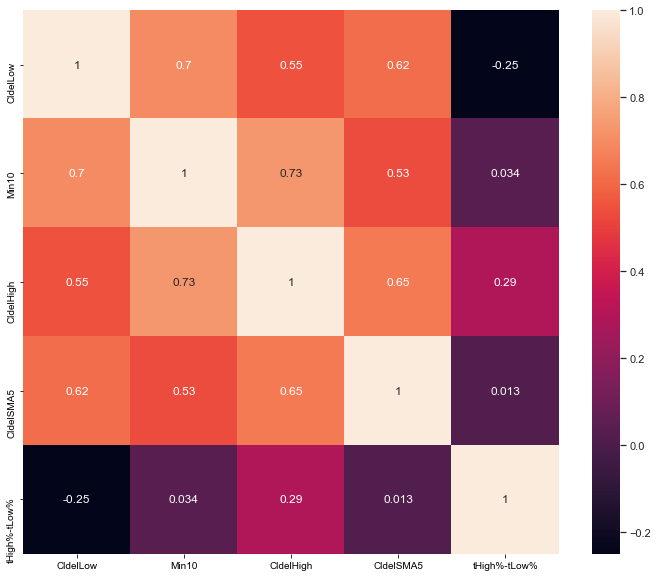

In [13]:
fig, ax  = plt.subplots(figsize = (12,10))
import seaborn as sns; sns.set()
ax = sns.heatmap(cor.corr(), annot=True)

In [11]:
pd.pivot_table(data_f[
    (data_f['KSTClose_10_10_15_10_20_10_30_15']>-503.8)
   &(data_f['KSTClose_10_10_15_10_20_10_30_15']<-76)
],
               index='Year',
               values='res_profit',
               aggfunc=['mean', 'count'],
               margins=True
              )

KeyError: 'res_profit'

In [324]:
writer = pd.ExcelWriter('result_11page_.xlsx', engine='openpyxl', mode="a")
result_(0.55,0.5).to_excel(writer, sheet_name = '0.55 все цикл(кол и срд)', startcol = 1)
writer.save()
writer.close()